In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('housingdata.csv')
print(df)
df_median = df[:]

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [11]:
# 결측치를 평균값으로 대체
for i in df_median.columns:
    if df_median[i].isnull().sum() > 0:
        # CHAS 는 0 과 1로 구분되어 0으로 대체
        if i == 'CHAS':
            df_median[i] = df_median[i].fillna(0)
        else:
            df_median[i] = df_median[i].fillna(df[i].median())

In [8]:
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = df_median[i].quantile(0.25)
    Q3 = df_median[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    df_median[i] = df_median[i].apply(lambda x: Q3 if x > upper_bound else x)
    df_median[i] = df_median[i].apply(lambda x: Q1 if x < lower_bound else x)


In [9]:
# 'AGE', 'CHAS', 'B' 삭제
X = df_median[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_median['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 다항 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 21.426724862823335
R^2 Score: 0.7124435013801336


In [ ]:
#의사결정나무 모델
X = df_median[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_median['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# # 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 24.64901960784314
R^2 Score: 0.6638790671148761


In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train_scaled, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test_scaled)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred)
print(f'랜덤 포레스트 모델의 MSE: {mse_rf}')
print(f'R^2 Score: {r2}')

랜덤 포레스트 모델의 MSE: 7.880560235294121
R^2 Score: 0.6638790671148761


In [ ]:
# 결측치 제거
df_without_na = df.dropna(axis = 0)
print(df_without_na)

        CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
5    0.02985   0.0   2.18   0.0  0.458  ...  222     18.7  394.12   5.21  28.7
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
499  0.17783   0.0   9.69   0.0  0.585  ...  391     19.2  395.77  15.10  17.5
500  0.22438   0.0   9.69   0.0  0.585  ...  391     19.2  396.90  14.33  16.8
502  0.04527   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.48  22.0

[394 rows x 14 columns]


In [ ]:
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = df_without_na[i].quantile(0.25)
    Q3 = df_without_na[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    df_without_na[i] = df_without_na[i].apply(lambda x: Q3 if x > upper_bound else x)

In [ ]:
X = df_without_na[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_without_na['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 다항 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 29.124606927221866
R^2 Score: 0.6877965729481172


In [ ]:
# 결측치 제거, 의사결정나무 모델
X = df_without_na[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_without_na['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# # 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 24.78721518987343
R^2 Score: 0.7061260733254502


In [ ]:
X = df_without_na[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_without_na['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train_scaled, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test_scaled)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred)
print(f'랜덤 포레스트 모델의 MSE: {mse_rf}')
print(f'R^2 Score: {r2}')

랜덤 포레스트 모델의 MSE: 28.246595949367084
R^2 Score: 0.7061260733254502


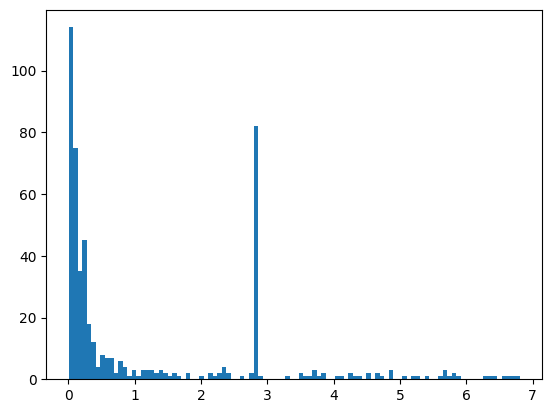

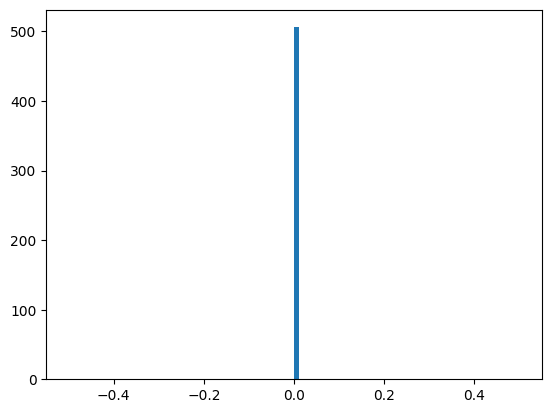

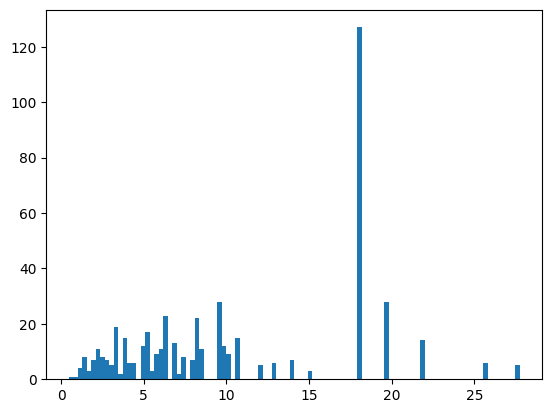

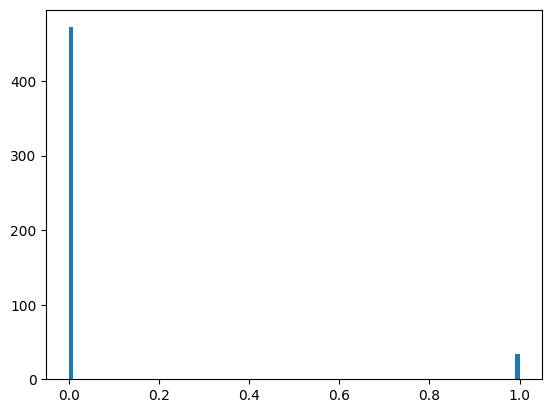

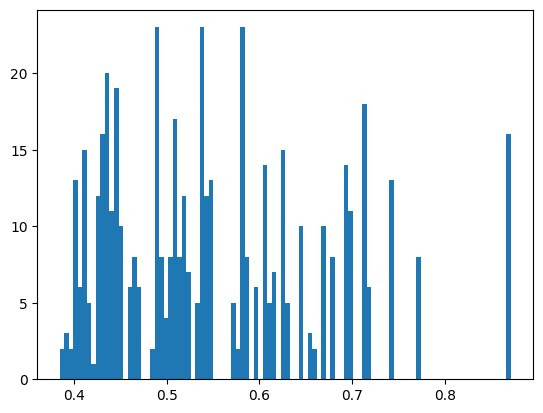

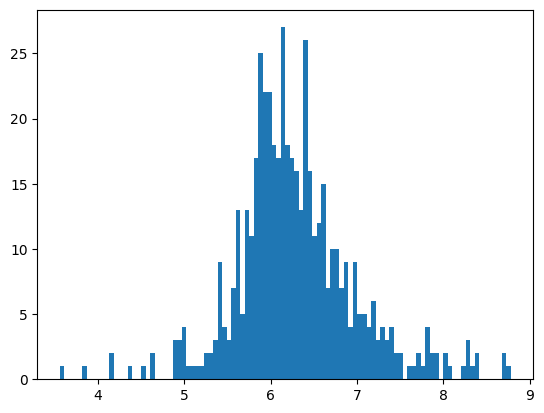

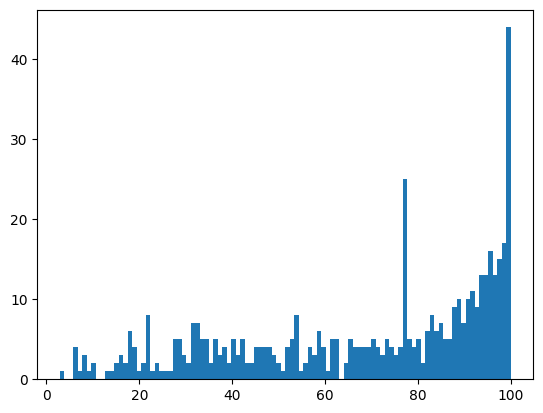

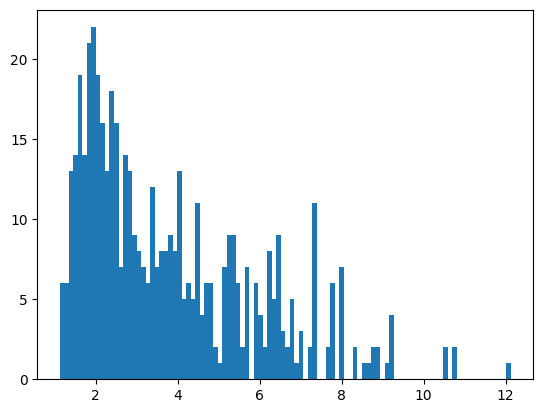

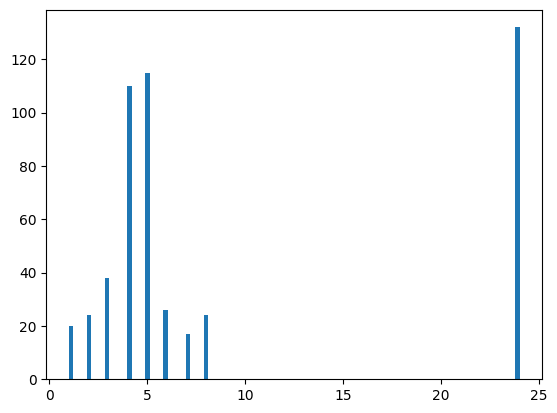

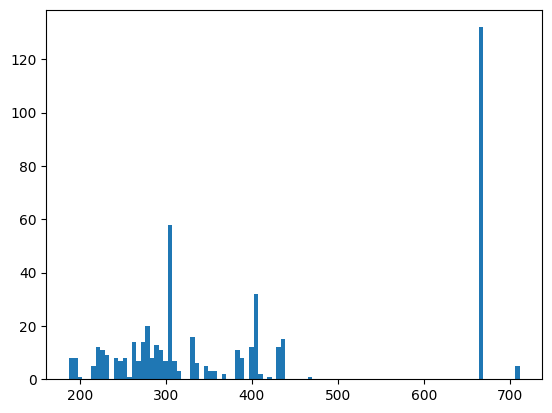

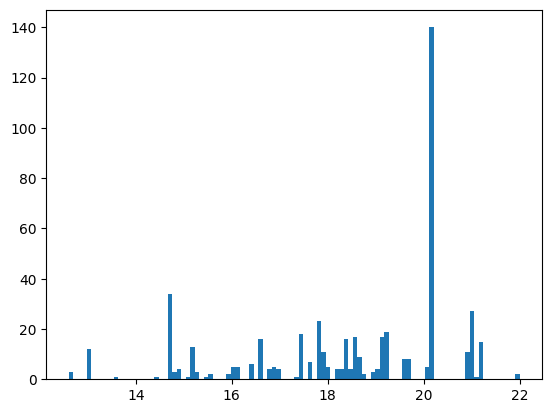

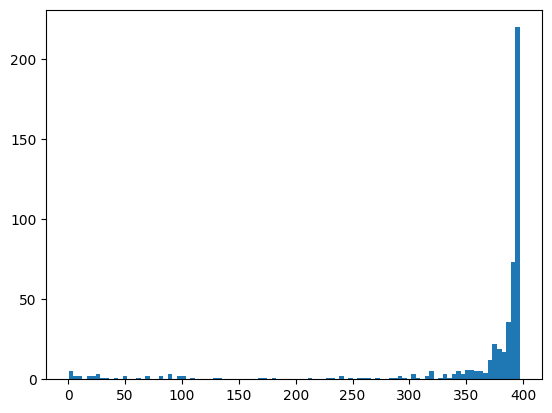

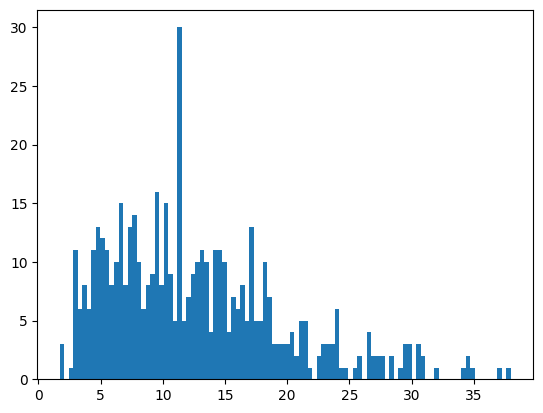

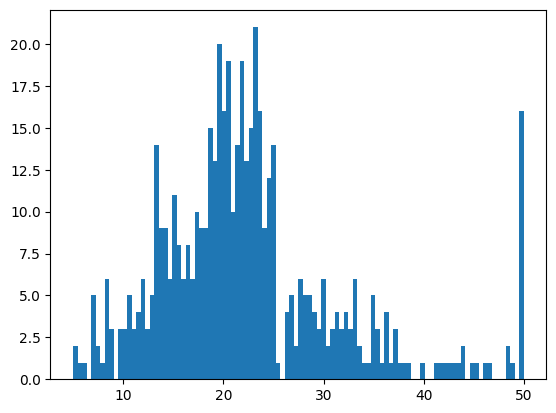

In [14]:
for i in df_median.columns:
    N = len(df_median[i])
    X = df_median[i]
    
    plt.hist(X,bins = 100, label = i)
    plt.show()